Goal: Análisis de datos con Python

Ejercicio: Analizar el dataset, entre las siguientes consideraciones, se debe usar funciones y lambdas

Entre la informacion que quiero que consigas es:

- Resumen de la data, max,min ….
- Overwiew de la data
- Imports in kg per capita
- Re-exports in kg per capita
- Consumition in kg per capita
- Testear Normalización
- who drinks more coffee on average: Europeans or Americans?
- the relation between import and re-export

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px  #with anaconda3

### Import Datset 

In [2]:
df = pd.read_csv("dataset/Coffee_domestic_consumption.csv", sep=",")

df.head(5)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


In [73]:
# Get the number of rows and columns
rows = len(df.axes[0])
cols = len(df.axes[1])
  
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))


df.info()


Number of Rows: 55
Number of Columns: 33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     55 non-null     object
 1   Coffee type                 55 non-null     object
 2   1990/91                     55 non-null     int64 
 3   1991/92                     55 non-null     int64 
 4   1992/93                     55 non-null     int64 
 5   1993/94                     55 non-null     int64 
 6   1994/95                     55 non-null     int64 
 7   1995/96                     55 non-null     int64 
 8   1996/97                     55 non-null     int64 
 9   1997/98                     55 non-null     int64 
 10  1998/99                     55 non-null     int64 
 11  1999/00                     55 non-null     int64 
 12  2000/01                     55 non-null     int64 
 13  2001/02    

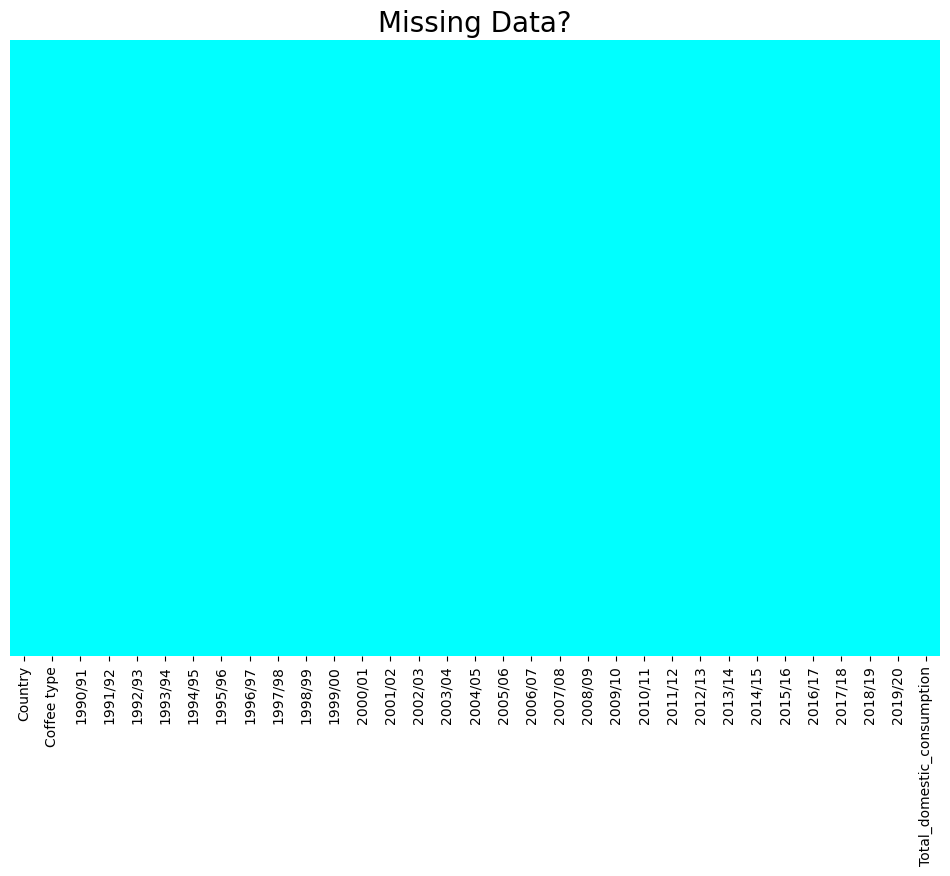

In [11]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.isnull(),cmap='cool',cbar=False,yticklabels=False)
plt.title('Missing Data?',fontsize=20)
plt.show()
#The data dont have NAs or spaces without data 

Arabica            22
Robusta            15
Robusta/Arabica    10
Arabica/Robusta     8
Name: Coffee type, dtype: int64


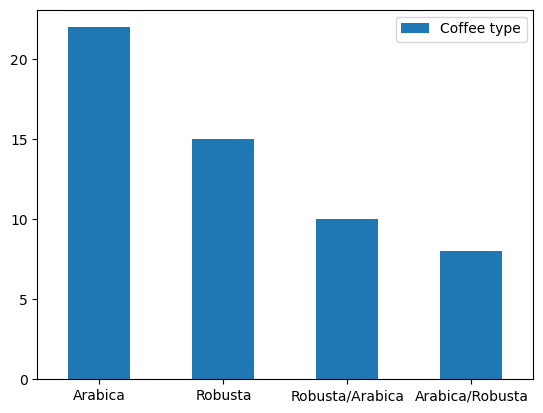

In [63]:
val_coffee_type = df["Coffee type"].value_counts()
print(val_coffee_type)
type(val_coffee_type)


coffee_type = val_coffee_type.to_frame()
type(coffee_type)

# PANDAS
ax = coffee_type.plot.bar(rot=0)


['Arabica', 'Robusta', 'Robusta/Arabica', 'Arabica/Robusta']
[22, 15, 10, 8]


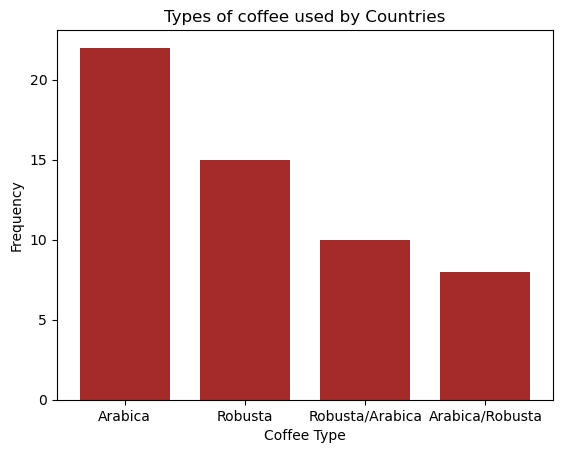

In [71]:
# MATPLOTLIB

types = list(val_coffee_type.keys())
print(types)
values = list(val_coffee_type)
print(values)


plt.bar(types,values,color ='brown', width = 0.75)

plt.xlabel("Coffee Type")
plt.ylabel("Frequency")
plt.title("Types of coffee used by Countries")
plt.show()

In [90]:
sort_consump =sorted(df['Total_domestic_consumption'], reverse=True)
print(sort_consump)

max_country_coffee = df[(sorted((df['Total_domestic_consumption']>=1248600000), reverse=True))]
max_country_coffee


[27824700000, 4920480000, 4536540000, 3189660000, 2807280000, 2536776384, 2386067999, 2093460000, 1920928320, 1248600000, 665335200, 642823380, 600600000, 590880000, 588705960, 471850680, 417242040, 410260140, 402000000, 384006000, 381540000, 359880000, 299700300, 284816400, 157980000, 143450940, 122916960, 121620000, 95190000, 86730000, 76425060, 75180000, 70740000, 58300020, 46500000, 35100000, 24794400, 21090000, 18688020, 10080000, 9970800, 9203040, 8640000, 8595960, 5360040, 3608400, 3412020, 2340000, 2167620, 2139960, 1123140, 991920, 294000, 0, 0]


,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000
5,Indonesia,Robusta/Arabica,74520000,76800000,79140000,81540000,84000000,86580000,89160000,91920000,...,220020000,234000000,255000000,265020000,273000000,279000000,285000000,288000000,288360000,4920480000
6,Madagascar,Robusta,21000000,18000000,21000000,21600000,9999960,10020000,10020000,10020000,...,27000000,25800000,24600000,23400000,22200000,21600000,21900000,22500000,22500000,588705960
7,Malawi,Arabica,120000,120000,120000,120000,120000,120000,120000,120000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,2340000
8,Papua New Guinea,Arabica/Robusta,180000,180000,180000,120000,120000,120000,120000,120000,...,74160,102660,122340,115440,108000,120000,120000,120000,120000,3608400
9,Paraguay,Arabica,900000,900000,900000,1200000,1200000,1200000,1200000,1200000,...,1200000,1200000,1200000,1200000,1200000,1200000,1200000,1200000,1200000,35100000


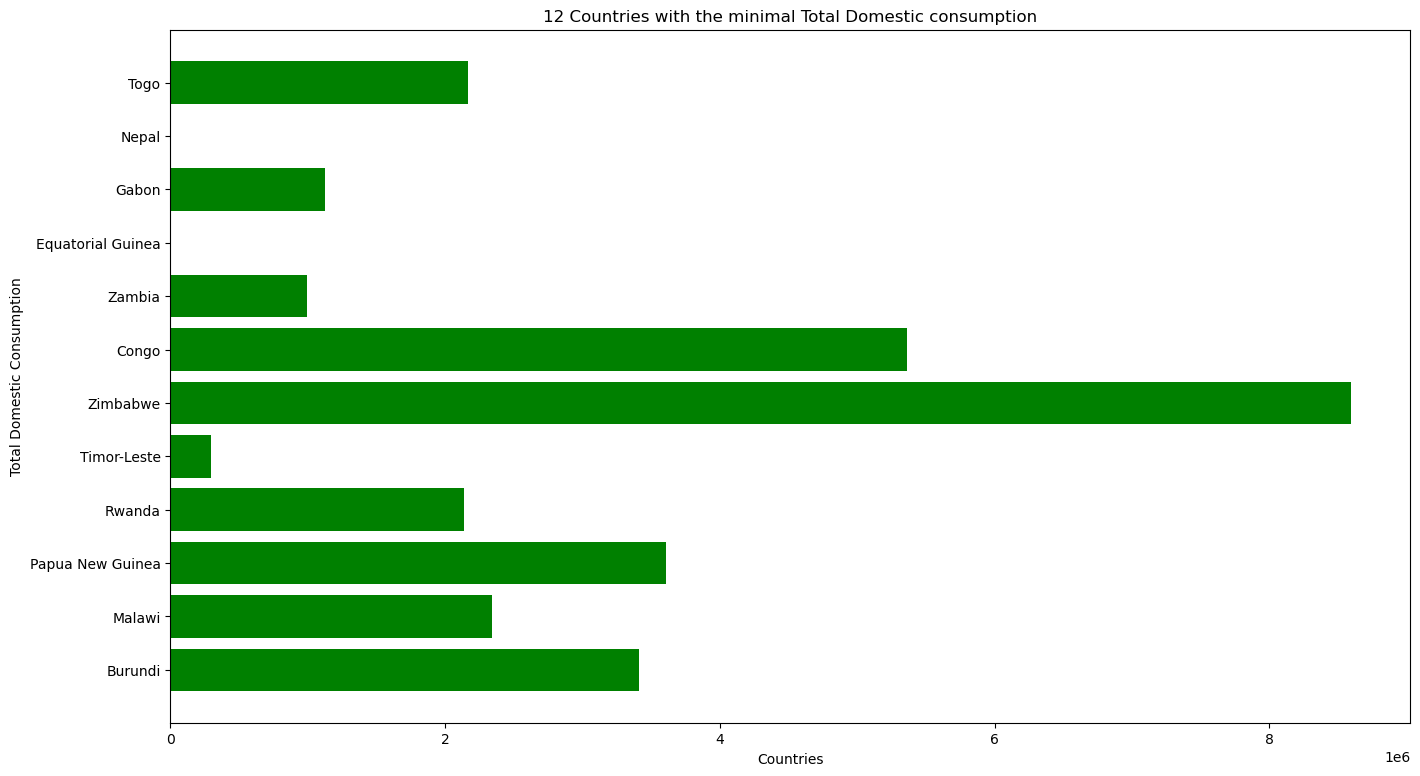

In [15]:

min_country_coffee = df[(df['Total_domestic_consumption']<=8595960)]
min_country_coffee


min10_values_coffee = min_country_coffee['Total_domestic_consumption']
min10_values_coffee

min10_country_coffee = min_country_coffee['Country']
min10_country_coffee

# PLOT

fig, ax = plt.subplots(figsize =(16, 9))

plt.barh(min10_country_coffee,min10_values_coffee,color ='green')

plt.xlabel("Countries")
plt.ylabel("Total Domestic Consumption")
plt.title("12 Countries with the minimal Total Domestic consumption")
plt.show()